In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%%capture
!unzip /content/gdrive/MyDrive/archive.zip -d /content/training-dataset/

In [ ]:
!mv "/content/training-dataset/train/train" "/content/"
!mv "/content/training-dataset/test/test" "/content/"

!rmdir "/content/training-dataset/train"
!rmdir "/content/training-dataset/test"

!mv "/content/train" "/content/training-dataset/"
!mv "/content/test" "/content/training-dataset/"

In [ ]:
%%capture
!unzip /content/gdrive/MyDrive/test-archive.zip -d /content/testing-dataset

In [ ]:
!mv "/content/testing-dataset/development_test_data/gallery" "/content/"
!mv "/content/testing-dataset/development_test_data/queries/" "/content/"
!mv "/content/testing-dataset/development_test_data/gallery.csv" "/content/"
!mv "/content/testing-dataset/development_test_data/queries.csv" "/content/"

!rmdir "/content/testing-dataset/development_test_data"

!mv "/content/gallery" "/content/testing-dataset/"
!mv "/content/queries" "/content/testing-dataset/"
!mv "/content/gallery.csv" "/content/testing-dataset/"
!mv "/content/queries.csv" "/content/testing-dataset/"

mv: cannot move '/content/gallery' to '/content/testing-dataset/gallery': Directory not empty
mv: cannot move '/content/queries' to '/content/testing-dataset/queries': Directory not empty


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from pathlib import Path
from sklearn.cluster import KMeans

In [ ]:
def get_img(img_path):
  """
  This function returns an image in the format RGB when the path
  to the image is given

  Parameters
  ----------
  img_path: string
      The path to the image

  Returns
  -------
  RGB image of the image in the specified path
  """
  return cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

def view_and_get_info_random_image(folder):
  """
  This function takes a path of a folder that contains images and
  display a random image from that folder along with its shape

  Parameters
  ----------
  folder: string
      The path of the folder with pictures (all the files within that folder should be images)

  Return
  ------
  The rendered random image
  """
  # Get a random image path
  random_image = random.sample(os.listdir(folder), 1)

  # Read in the image and plot it using matplotlib
  img = get_img(folder + random_image[0])
  plt.imshow(img)
  plt.title(folder + random_image[0])
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

def draw_bounding_box_and_save(img_path, x, y, w, h):
  """
  This function draw a bounding box specified by x, y, w, h parameters
  and save the image in the '/content/temp-imgs/' folder

  Parameters
  ----------
  img_path: string
      The path to original image which the bounding box should be drawn
  x: integer
      x-coordinate of top-left corner of bounding box
  y: integer
      y-coordinate of top-left corner of bounding box
  w: integer
      width of bounding box in pixels
  h: integer
      height of bounding box in pixels
  """
  image = get_img(img_path)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 4)

  Path("/content/temp-imgs").mkdir(parents=True, exist_ok=True)

  filepath = '/content/temp-imgs/' + img_path.split('/')[-1]
  cv2.imwrite(filepath, image)
  return filepath

Image shape: (1334, 1000, 3)


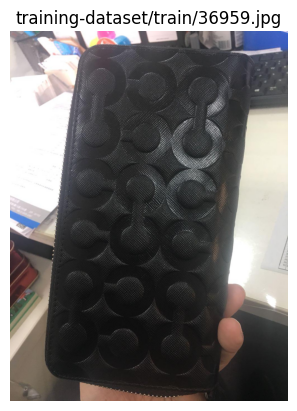

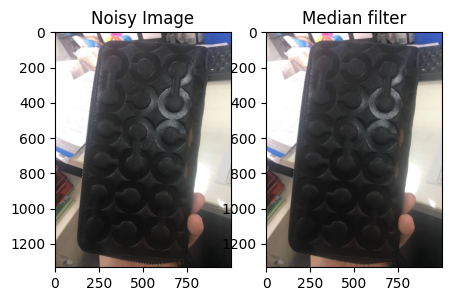

In [ ]:
#Median filter
img = view_and_get_info_random_image('training-dataset/train/')
median = cv2.medianBlur(img,5)
plt.figure(figsize=(5, 5))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

Image shape: (1136, 852, 3)


error: ignored

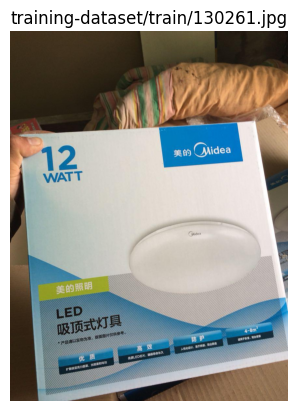

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
cropping_standard = cv2.imread('dog_cropping_standard.jpg',0) # standard
target_image =view_and_get_info_random_image('training-dataset/train/')# image that will be cropped

sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors
standard_kp, standard_des = sift.detectAndCompute(cropping_standard,None)
target_kp, target_des = sift.detectAndCompute(target_image,None)



**Shifting**

This is the process of shifting image pixels horizontally or vertically.



Image shape: (585, 1040, 3)


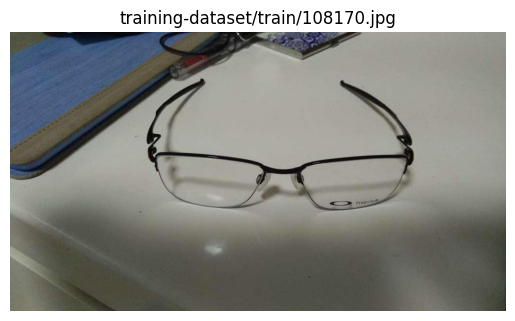

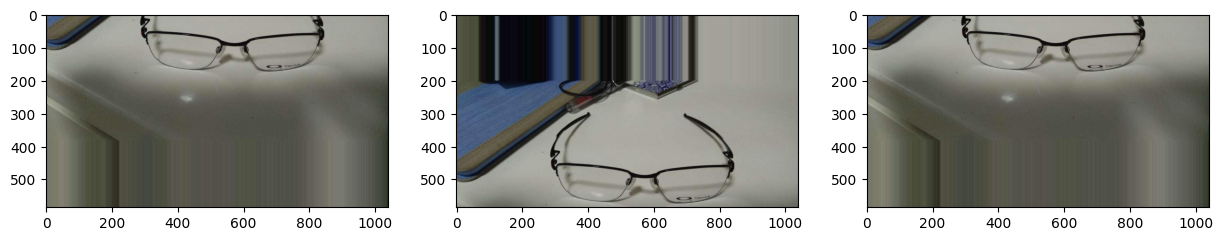

In [ ]:
# import libraries

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
image =  view_and_get_info_random_image('training-dataset/train/')
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

**Changing brightness**

This is the process of increasing or decreasing image contrast.

Image shape: (1334, 1000, 3)


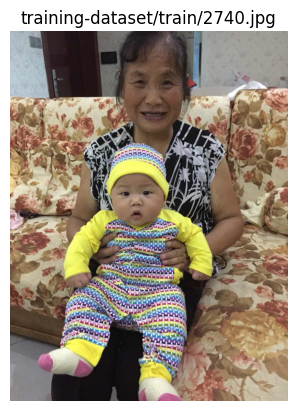

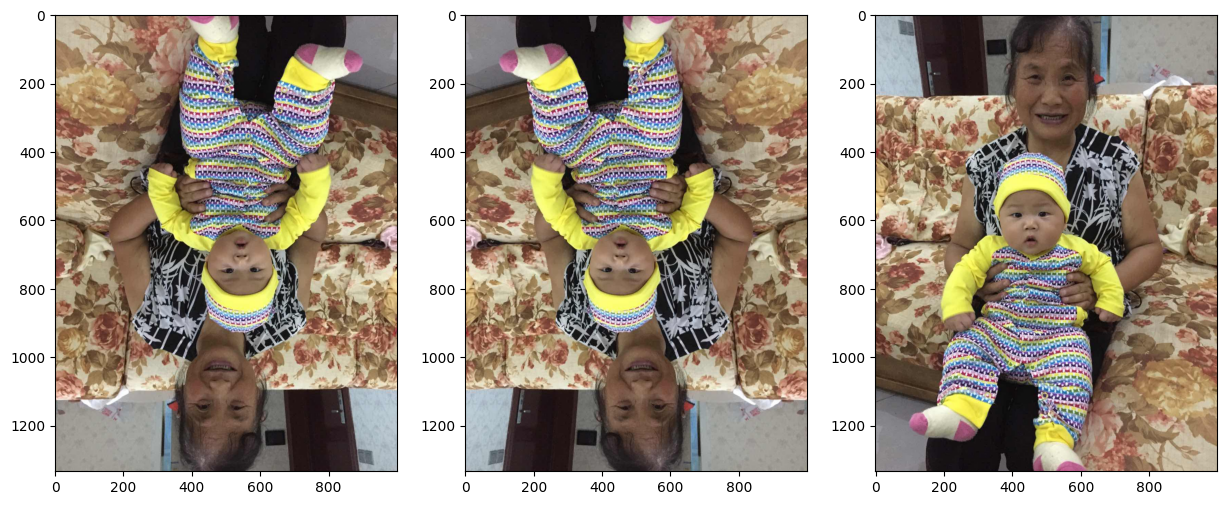

In [ ]:
 #convert to numpy array
image =  view_and_get_info_random_image('training-dataset/train/')
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

Image shape: (800, 800, 3)


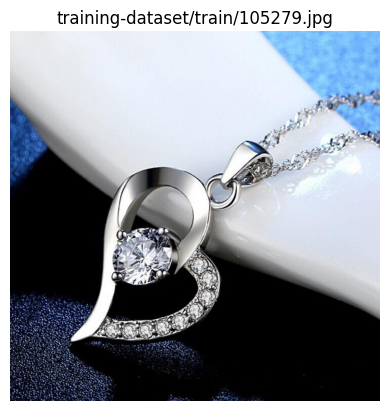

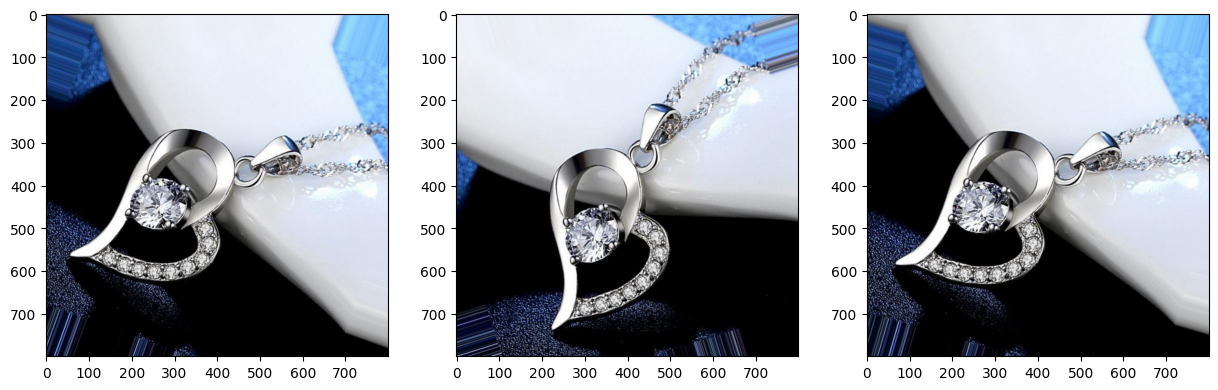

In [ ]:
 #convert to numpy array
image =  view_and_get_info_random_image('training-dataset/train/')
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')

    # plot image
    im[i].imshow(image)

In [ ]:
from skimage import io

Image shape: (1280, 960, 3)


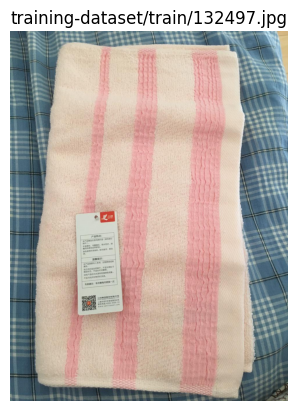

In [ ]:
image = view_and_get_info_random_image('training-dataset/train/')
rows, cols = image.shape[:2]
cropped_image = image[rows//4:-rows//4, cols//4:-cols//4]


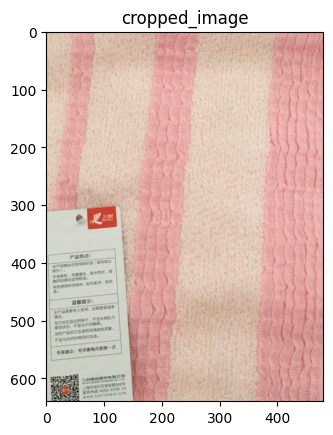

In [ ]:
plt.imshow(cropped_image,cmap = 'gray')
plt.title('cropped_image')
plt.show()